## Heavy Residue in Building 77 ##

The data about Heavy Residue (henceforth HR) contains information about the weight of each material class found in each unit(context). For the purpose of this analysis, all three fractions (4mm, 2mm and 1mm) were combined. The weights were standardized, and the values represent total weight of each material, dividied by the number of litres of soil. The data was exported from the Heavy Residue Database. 


**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### 1 Inspecting Data

In [2]:
#importing data
df = pd.read_csv('Building77.csv')

In [3]:
#Checking the number of records. The dataframe contains 308 records and 31 columns.
df.shape

(308, 31)

In [4]:
#Checking the information stored in each column
df.columns

Index(['UNIT', 'Sample', 'Flot Number', 'GID', 'Sum of Flot Volume',
       'Clay Ball', 'Figurine', 'Clay Object', 'Shaped Clay', 'Pottery',
       'Stone', 'Worked Bone', 'Worked Stone', 'Beads ', 'Plant ', 'Bone ',
       'Mollusc ', 'Eggshell ', 'Obsidian ', 'Flint', 'Mound', 'Area',
       'Building', 'Space', 'Feature', 'DataCategory', 'Location',
       'Description', 'context', 'context subtype', 'Occ Phase'],
      dtype='object')

In [5]:
#removing blank spaces from column names
df = df.rename(columns =lambda x: x.replace(' ',''))

df.columns

Index(['UNIT', 'Sample', 'FlotNumber', 'GID', 'SumofFlotVolume', 'ClayBall',
       'Figurine', 'ClayObject', 'ShapedClay', 'Pottery', 'Stone',
       'WorkedBone', 'WorkedStone', 'Beads', 'Plant', 'Bone', 'Mollusc',
       'Eggshell', 'Obsidian', 'Flint', 'Mound', 'Area', 'Building', 'Space',
       'Feature', 'DataCategory', 'Location', 'Description', 'context',
       'contextsubtype', 'OccPhase'],
      dtype='object')

In [6]:
#showing the first five rows 
df.head()

,UNIT,Sample,FlotNumber,GID,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,contextsubtype,OccPhase
0,16400,2,7930,16400.2.7930,27.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",NaN,fill,building,NaN,fill,fill building,B77.9
1,16401,2,7899,16401.2.7899,26.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,337,",NaN,fill,building,NaN,fill,fill building,B77.A
2,16402,2,7897,16402.2.7897,32.0,NaN,NaN,0.3525,0.00625,NaN,...,North,77,",336,",",16402,",fill,building,NaN,fill,fill building,B77.9
3,16403,2,7943,16403.2.7943,27.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",NaN,fill,building,NaN,fill,fill building,B77.9
4,16405,2,7938,16405.2.7938,26.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",NaN,fill,building,NaN,fill,fill building,B77.9


At the first glance, we can see  there are  missing values.

In [7]:
#Finding the number of missing values in each column
df.isna().sum()

UNIT                 0
Sample               0
FlotNumber           0
GID                  0
SumofFlotVolume      0
ClayBall           294
Figurine           304
ClayObject         292
ShapedClay         294
Pottery            297
Stone              109
WorkedBone         302
WorkedStone        302
Beads              271
Plant               42
Bone                 5
Mollusc             37
Eggshell           153
Obsidian            57
Flint              289
Mound                0
Area                 0
Building             0
Space                0
Feature             89
DataCategory         0
Location             2
Description        111
context              0
contextsubtype       0
OccPhase             9
dtype: int64

It appears that the missing values (NaN) are the result of some samples not having some material types. For example, Unit 22092 did not have any clay balls, figurines, clay objects, shaped clay or pottery. Information about Feature, Description, Location and Occupation Phase is also missing for a number of records, which is fine. For example, not all units belong to a feature, and Location and Description for some Data Categories is never entered (e.g. ). Occupation phase though should exist for each unit. Therefore, these rows will be dropped when considering distribution of material in each occupation phase. 

In [8]:
#checking the type of information stored in each column. 
df.dtypes

UNIT                 int64
Sample               int64
FlotNumber           int64
GID                 object
SumofFlotVolume    float64
ClayBall           float64
Figurine           float64
ClayObject         float64
ShapedClay         float64
Pottery            float64
Stone              float64
WorkedBone         float64
WorkedStone        float64
Beads              float64
Plant              float64
Bone               float64
Mollusc            float64
Eggshell           float64
Obsidian           float64
Flint              float64
Mound               object
Area                object
Building             int64
Space               object
Feature             object
DataCategory        object
Location            object
Description         object
context             object
contextsubtype      object
OccPhase            object
dtype: object

It appears that the pandas read the file correctly. All numeric values are stored as floats or integeres, whereas other fields represent strings (text).

In [9]:
#Describing values in the table
df.describe()

,UNIT,Sample,FlotNumber,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,Stone,WorkedBone,WorkedStone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint,Building
count,308.000000,308.000000,308.000000,308.000000,14.000000,4.000000,16.000000,14.000000,11.000000,199.0,6.000000,6.0,37.000000,266.000000,303.000000,271.000000,155.000000,251.000000,19.000000,308.0
mean,20197.188312,2.025974,9792.642857,17.299675,0.642061,0.053633,0.206102,0.460309,0.122193,1.0,0.293339,0.0,0.021650,0.339928,1.035441,0.041482,0.010186,0.065659,0.023413,77.0
std,3402.298414,0.455842,1111.818188,19.401279,0.645235,0.038576,0.228708,0.775415,0.103651,0.0,0.609772,0.0,0.033203,3.212798,1.846743,0.046206,0.021732,0.453180,0.020665,0.0
min,16400.000000,1.000000,7897.000000,0.100000,0.016176,0.015938,0.001538,0.002404,0.003974,1.0,0.011000,0.0,0.000488,0.000455,0.001667,0.001111,0.000286,0.000690,0.002500,77.0
25%,19006.750000,2.000000,9196.750000,6.000000,0.160268,0.036395,0.031284,0.043393,0.037925,1.0,0.019966,0.0,0.002273,0.006278,0.174000,0.010000,0.002000,0.010000,0.007636,77.0
50%,19424.000000,2.000000,9453.500000,13.500000,0.361349,0.045547,0.064688,0.093219,0.085000,1.0,0.053199,0.0,0.006000,0.017639,0.485000,0.025517,0.004643,0.022857,0.019167,77.0
75%,21628.750000,2.000000,10945.250000,24.000000,0.994444,0.062784,0.355721,0.343333,0.206750,1.0,0.086339,0.0,0.030000,0.054018,1.121116,0.055930,0.009167,0.043864,0.026628,77.0
max,30597.000000,5.000000,11993.000000,156.000000,2.293333,0.107500,0.631250,2.385909,0.303333,1.0,1.536364,0.0,0.157241,50.714286,15.493125,0.336562,0.165714,7.162000,0.072353,77.0


The summary above gives the basic information about each column, such as, minimum,maximum, median, mean and standard deviation for each column. It shows that the standard deviation is quite high for some values, meaning that the samples are not normally distributed. 
Also, standard deviation of stone is 0, meaning that only presence was marked for stone, and therefore, density could not be calculated.


In [10]:
df['Stone'].value_counts()

1.0    199
Name: Stone, dtype: int64

Presence of stone was marked with 1

### 2 Basic information about samples

In [11]:
# Checking number of samples from each context type
df['DataCategory'].value_counts()


fill                            123
construction/make-up/packing    104
floors (use)                     77
cluster                           3
activity                          1
Name: DataCategory, dtype: int64

Data Category represents the type of context. We can see that construction/make-up/packing (henceforth construction), fill, floors and burial fills are the categories worth exploring. Clusters should never have flotation samples (as they represent group of objects, and as such, they should not have any soil); therefore, this is a mistake. Also, as there is only one sample from the activity deposit, this will be removed as well.  

In [12]:
# removing cluster samples
df = df[df.DataCategory != 'cluster']
df = df[df.DataCategory != 'activity']

In [13]:
# renaming construction/make-up/packing 
df = df.replace('construction/make-up/packing','construction')

In [14]:
#Finding the total number of litres taken from each context type
df.groupby('DataCategory')['SumofFlotVolume'].sum()

DataCategory
construction    1239.4
fill            3012.4
floors (use)    1006.0
Name: SumofFlotVolume, dtype: float64

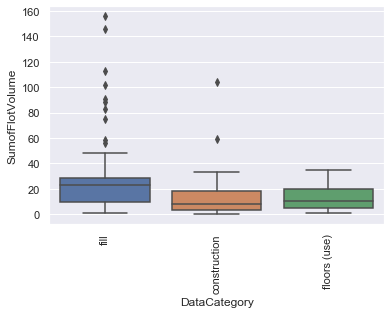

In [15]:
# visualising the volumes of each data category
sns.boxplot( x=df["DataCategory"], y=df['SumofFlotVolume'] );
plt.xticks(rotation=90);


We see that the fills have higher median volumes than the other two deposit types, and there are a number of samples with a much higher volume. 

### 3. How often are materials present in samples? 

In [18]:
#retrieving columns with material
cols= df.iloc[:, 5:20]
cols.columns

#Creating a new dataframe with presence/absence
presence = df.copy()
presence[cols.columns]= np.where(presence[cols.columns]>0, 1, 0)

# Count of samples in which each material is present
pres = presence[cols.columns].sum().sort_values(ascending=False)

#Calculating percentage of contexts containing each material
pres = pres/len(presence)*100
pres=round(pres.sort_values(ascending=False),2)
pres

Bone           98.36
Mollusc        87.83
Plant          86.18
Obsidian       81.58
Stone          64.80
Eggshell       50.33
Beads          12.17
Flint           6.25
ClayObject      4.93
ClayBall        4.61
ShapedClay      4.28
Pottery         3.62
WorkedBone      1.97
Figurine        1.32
WorkedStone     0.00
dtype: float64

''

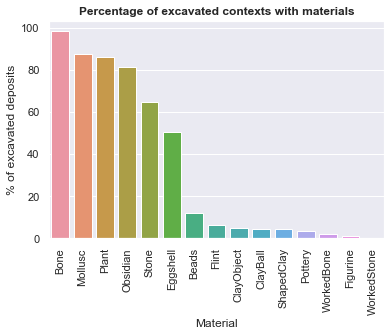

In [19]:
#Visualising the result
a = sns.barplot(x=pres.index, y=pres)
plt.xticks(rotation=90)
a.set_xlabel('Material')
a.set_ylabel('% of excavated deposits')
a.set_title('Percentage of excavated contexts with materials',fontweight='bold')
;

As shown above, animal bone is the most ubituous material and occurs in almost every sample. Other common materials are plant, mollusc, eggshell,stone and obsidian. Other materials are less frequent and occur in less than 50 samples.

In [20]:
#counting number of times a material class exists in a context type
presence2 = presence.groupby(['DataCategory'])[cols.columns].sum().reset_index()

presence2['samples'] = list(presence.groupby('DataCategory')['DataCategory'].count())

presence2

,DataCategory,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,Stone,WorkedBone,WorkedStone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint,samples
0,construction,4,0,5,4,0,49,2,0,3,79,100,87,42,74,8,104
1,fill,7,3,7,9,10,101,4,0,28,115,122,113,77,114,6,123
2,floors (use),3,1,3,0,1,47,0,0,6,68,77,67,34,60,5,77


In [21]:
#calculating percentage of contexts with each material

cols2= presence2.iloc[:, 1:16]

for i in cols2:
    presence2[i] = round(cols2[i]/presence2['samples']*100,2)
    
presence2

,DataCategory,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,Stone,WorkedBone,WorkedStone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint,samples
0,construction,3.85,0.00,4.81,3.85,0.00,47.12,1.92,0.0,2.88,75.96,96.15,83.65,40.38,71.15,7.69,104
1,fill,5.69,2.44,5.69,7.32,8.13,82.11,3.25,0.0,22.76,93.50,99.19,91.87,62.60,92.68,4.88,123
2,floors (use),3.90,1.30,3.90,0.00,1.30,61.04,0.00,0.0,7.79,88.31,100.00,87.01,44.16,77.92,6.49,77


As shown above, animal bone is the most ubituous material and occurs in almost every sample. Other common materials are plant, mollusc, eggshell and obsidian. Other materials are less frequent, though it should be noted that they all seem to occur more commonly  in  fills than in other types of deposits. 

### 4. What is the density of materials in different context types?

Density of material was already calculated for each sample. It is calculated as weight of material per litre of soil sample. 

In [22]:
# Replacing missing valuse with 0
df2 = df.copy()
df2 =df2.fillna(0)

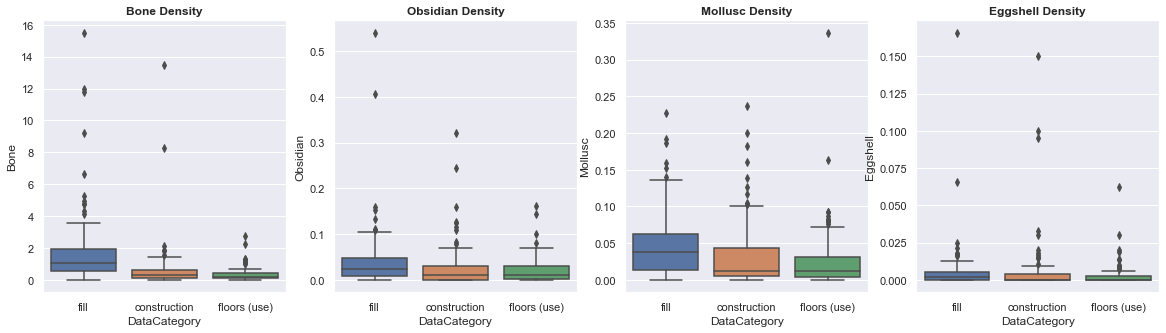

In [23]:
fix, ax = plt.subplots(nrows=1, ncols=4, figsize= (20,5))

sns.boxplot(df2["DataCategory"], df2['Bone'],
             ax=ax[0]);
ax[0].set_title("Bone Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Obsidian'],
             ax=ax[1]);
ax[1].set_title("Obsidian Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Mollusc'],
             ax=ax[2]);
ax[2].set_title("Mollusc Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Eggshell'],
             ax=ax[3]);
ax[3].set_title("Eggshell Density", fontweight='bold');


As the values are normally distributed, there are a lot of outliers. 
Nevertheless, it is clear that all frequent materials have a higher density in  fills than they do in other types of deposits. 

''

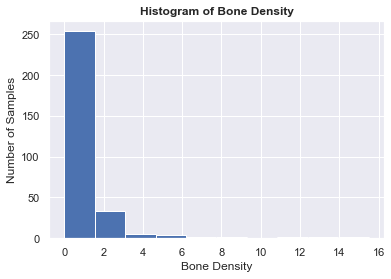

In [24]:
# showing distribution of bone

fig, ax = plt.subplots()

ax1 = df2['Bone'].hist(bins=10)
ax1.set_title("Histogram of Bone Density", fontweight='bold');
ax1.set_xlabel('Bone Density')
ax1.set_ylabel('Number of Samples')
;

We can also normalize the data by using Log10 transformation. However in this case, samples that contain no material will be excluded,as Log10 does not exist for 0.

### 5. What are the differences in the distribution of material across different fill types?

In [25]:
#selecting fill samples and assigning them to a new dataframe

fills = df2.loc[df2['DataCategory']=='fill']
fills

,UNIT,Sample,FlotNumber,GID,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,contextsubtype,OccPhase
0,16400,2,7930,16400.2.7930,27.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.9
1,16401,2,7899,16401.2.7899,26.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,337,",0,fill,building,0,fill,fill building,B77.A
2,16402,2,7897,16402.2.7897,32.0,0.0,0.0,0.352500,0.00625,0.000000,...,North,77,",336,",",16402,",fill,building,0,fill,fill building,B77.9
3,16403,2,7943,16403.2.7943,27.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.9
4,16405,2,7938,16405.2.7938,26.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,30155,2,10939,30155.2.10939,10.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.4
295,30164,2,10949,30164.2.10949,2.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",",7307,",fill,cut,pit,fill,fill pit,B77.6
303,30195,2,11143,30195.2.11143,23.5,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",",7309,",fill,cut,burial,burial fill,burial fill,B77.2.C
304,30548,2,10778,30548.2.10778,75.0,0.0,0.0,0.005067,0.00000,0.053733,...,North,77,",336,",",7137,",fill,cut,burial,burial fill,burial fill,B77.3


In [26]:
#calculating how many samples were taken from each fill type
fills['contextsubtype'].value_counts()


fill building              51
burial fill                33
fill bin                    7
fill posthole/stakehole     6
fill hearth                 5
fill between walls          5
fill foundation             4
fill pit                    4
fill basin                  3
fill oven                   2
fill scoop                  1
fill niche                  1
fill                        1
Name: contextsubtype, dtype: int64

Given that only room fills (building fills) and burial fills have more than 10 samples, these two types will be compared in order to see their differences


In [27]:
fills_selection = fills[fills['contextsubtype'].isin(['burial fill','fill building'])]
fills_selection

,UNIT,Sample,FlotNumber,GID,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,contextsubtype,OccPhase
0,16400,2,7930,16400.2.7930,27.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.9
1,16401,2,7899,16401.2.7899,26.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,337,",0,fill,building,0,fill,fill building,B77.A
2,16402,2,7897,16402.2.7897,32.0,0.0,0.0,0.352500,0.00625,0.000000,...,North,77,",336,",",16402,",fill,building,0,fill,fill building,B77.9
3,16403,2,7943,16403.2.7943,27.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.9
4,16405,2,7938,16405.2.7938,26.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,30152,2,10945,30152.2.10945,20.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.4
290,30154,2,10975,30154.2.10975,48.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",",7309,",fill,cut,burial,burial fill,burial fill,B77.2.C
291,30155,2,10939,30155.2.10939,10.0,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",0,fill,building,0,fill,fill building,B77.4
303,30195,2,11143,30195.2.11143,23.5,0.0,0.0,0.000000,0.00000,0.000000,...,North,77,",336,",",7309,",fill,cut,burial,burial fill,burial fill,B77.2.C


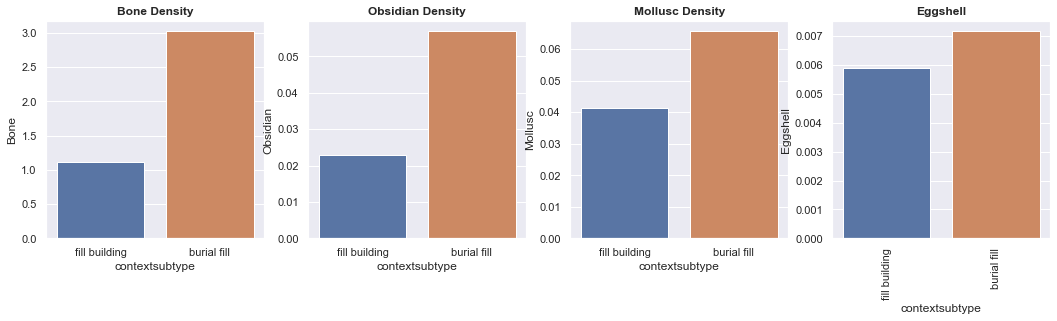

In [33]:
#plotting densities of Bone and obsidian 

fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (18,4))

sns.barplot(fills_selection["contextsubtype"], fills['Bone'],
             ax=ax[0], ci=None);
plt.xticks(rotation=90);
ax[0].set_title("Bone Density", fontweight='bold');
plt.xticks(rotation=90)

sns.barplot(fills_selection["contextsubtype"], fills['Obsidian'],
             ax=ax[1], ci=None);
ax[1].set_title("Obsidian Density", fontweight='bold');

sns.barplot(fills_selection["contextsubtype"], fills_selection['Mollusc'],
             ax=ax[2], ci=None);
plt.xticks(rotation=90);
ax[2].set_title("Mollusc Density", fontweight='bold');
plt.xticks(rotation=90)

sns.barplot(fills_selection["contextsubtype"], fills_selection['Eggshell'],
             ax=ax[3], ci=None);
ax[3].set_title("Eggshell", fontweight='bold');




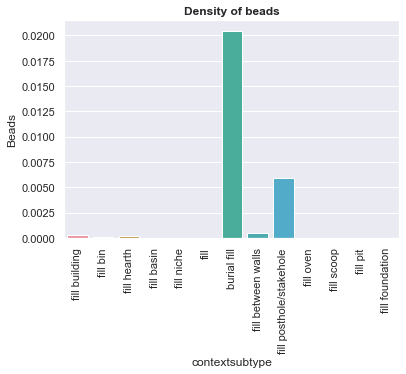

In [30]:
#Plotting density of beads in all fill types

ax= sns.barplot(fills["contextsubtype"], fills['Beads'],
             ci=None)
plt.xticks(rotation=90);
ax.set_title("Density of beads", fontweight='bold');

Burial fills have a higher density of materials than building fills (and other types of fills do), especially when it comes to beads, bone and obsidian. This points to the need for further examination of materials in burial fills, and their common interpretation in archaeology as accidental inclusions (rather than deliberate placement). 

In [34]:
#Do density of common materials in burial fills correlate?

#selecting the materials and assigning it to a new variable
fills_selection2 = fills_selection[['contextsubtype','Plant','Bone','Obsidian','Eggshell','Mollusc']]
#calculating Pearson`s correlation
fills_selection2.loc[fills_selection2['contextsubtype']=='burial fill'].corr()

,Plant,Bone,Obsidian,Eggshell,Mollusc
Plant,1.000000,-0.116220,-0.069708,-0.042050,0.117699
Bone,-0.116220,1.000000,0.134757,-0.167881,-0.270452
Obsidian,-0.069708,0.134757,1.000000,-0.085146,0.074371
Eggshell,-0.042050,-0.167881,-0.085146,1.000000,0.447878
Mollusc,0.117699,-0.270452,0.074371,0.447878,1.000000


In [35]:
#checking correlation in all contexts

df2_selection = df2[['Plant','Bone','Obsidian','Eggshell','Mollusc']]

df2_selection.corr()

,Plant,Bone,Obsidian,Eggshell,Mollusc
Plant,1.000000,0.005395,-0.036300,-0.008172,-0.025276
Bone,0.005395,1.000000,0.143004,0.078659,0.088913
Obsidian,-0.036300,0.143004,1.000000,0.111041,0.193293
Eggshell,-0.008172,0.078659,0.111041,1.000000,0.120743
Mollusc,-0.025276,0.088913,0.193293,0.120743,1.000000


As shown above densities of materials in burial fills, as well as in all deposits do not strongly correlate. That is, samples with a high density of one type of material do not necessarily have high densities of other materials as well.

In [ ]:
## adding a column with total number of samples from each context
#presence['samples'] = presence.groupby('DataCategory')['DataCategory'].transform('count')

#presence